In [2]:
# environment
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
import tensorflow as tf
from tensorflow import keras

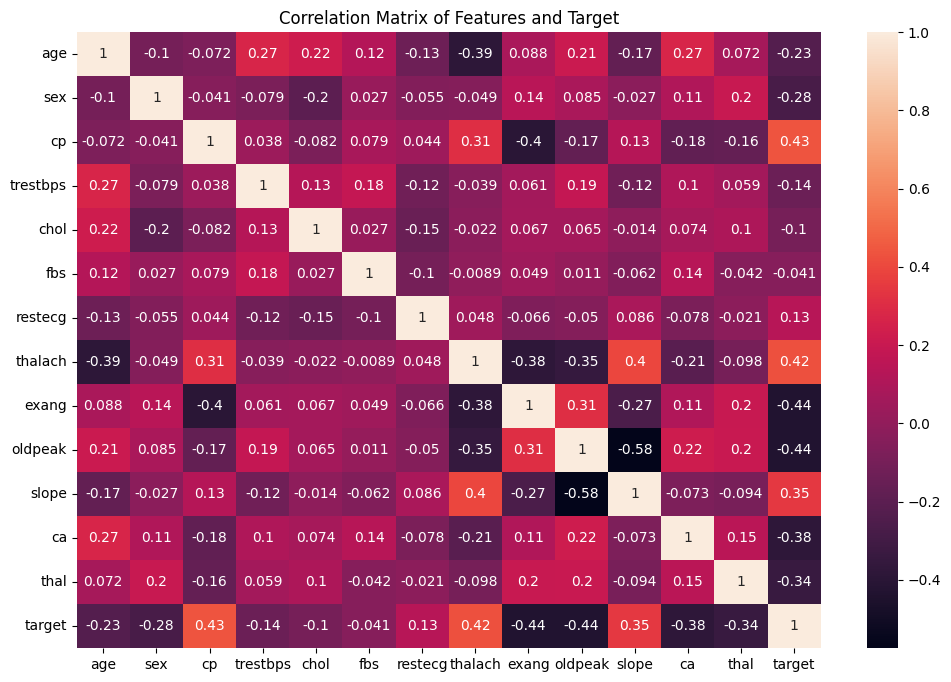

In [3]:
# load data
data = pd.read_csv('heart_disease_dataset.csv')

# create correlation matrix between features and target
corr_matrix = data.corr()

# visualize correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix of Features and Target")
plt.show()

In [4]:
# find top four most informative features
print("Top four most informative features with respect to target:")
print(corr_matrix['target'].drop('target').abs().sort_values(ascending=False).head(4))

Top four most informative features with respect to target:
oldpeak    0.438441
exang      0.438029
cp         0.434854
thalach    0.422895
Name: target, dtype: float64


In [5]:
# check for missing values
print("Number of null values in target:\n", data.isnull().sum())

# perform train-test-validation split
train_data, temp = train_test_split(data, test_size=0.4, random_state=42)
test_data, val_data = train_test_split(temp, test_size=0.5, random_state=42)

Number of null values in target:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [6]:
# prepare training data for cholesterol level linear regression
X_train = train_data.drop(columns=['chol'])  # features
y_train = train_data['chol'] # cholesterol

# create and fit linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

Validation Mean Squared Error: 2756.580564168612
Validation R^2 Score: 0.008390816109198118


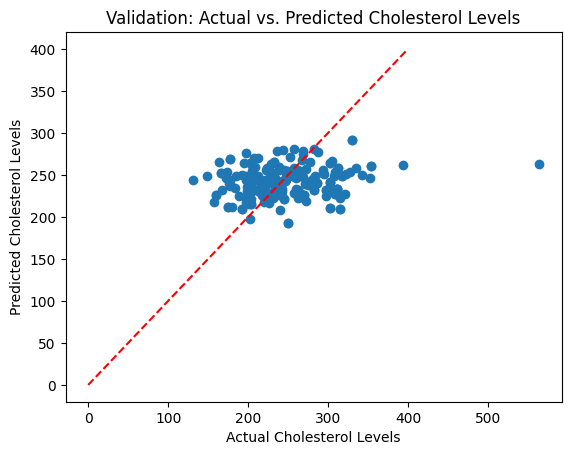

In [7]:
# prepare validation data
X_val = val_data.drop(columns=['chol'])  # features
y_val = val_data['chol'] # cholesterol

# make predictions on validation set
y_val_pred = lm.predict(X_val)

# evaluate model on validation set
print("Validation Mean Squared Error:", mean_squared_error(y_val, y_val_pred))
print("Validation R^2 Score:", r2_score(y_val, y_val_pred))

# visualize
plt.scatter(y_val, y_val_pred)
plt.xlabel('Actual Cholesterol Levels')
plt.ylabel('Predicted Cholesterol Levels')
plt.title('Validation: Actual vs. Predicted Cholesterol Levels')
plt.plot([0, 400], [0, 400], color='red', linestyle='--') # y = x
plt.show()

Test Mean Squared Error: 3413.751302814825
Test R^2 Score: 0.09752670382023076


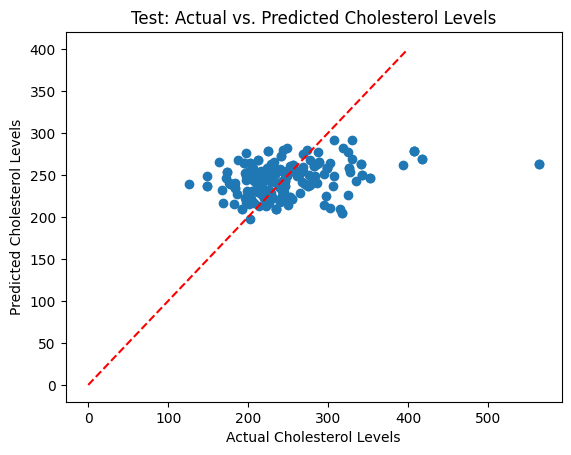

In [8]:
# prepare test data
X_test = test_data.drop(columns=['chol'])  # features
y_test = test_data['chol'] # cholesterol

# make predictions on test set
y_test_pred = lm.predict(X_test)

# evaluate model on test set
print("Test Mean Squared Error:", mean_squared_error(y_test, y_test_pred))
print("Test R^2 Score:", r2_score(y_test, y_test_pred))

# visualize
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Cholesterol Levels')
plt.ylabel('Predicted Cholesterol Levels')
plt.title('Test: Actual vs. Predicted Cholesterol Levels')
plt.plot([0, 400], [0, 400], color='red', linestyle='--') # y = x
plt.show()

In [9]:
# min-max normalization
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)

# fit model to normalized data
lm.fit(X_train_normalized, y_train)

# make predictions
y_val_pred = lm.predict(X_val_normalized)
y_test_pred = lm.predict(X_test_normalized)

# performance metrics
print("Validation Mean Squared Error:", mean_squared_error(y_val, y_val_pred))
print("Validation R^2 Score:", r2_score(y_val, y_val_pred))
print("Test Mean Squared Error:", mean_squared_error(y_test, y_test_pred))
print("Test R^2 Score:", r2_score(y_test, y_test_pred))

Validation Mean Squared Error: 2756.5805641686125
Validation R^2 Score: 0.008390816109197896
Test Mean Squared Error: 3413.751302814825
Test R^2 Score: 0.09752670382023076


In [10]:
# z-score normalization
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)

# fit model to normalized data
lm.fit(X_train_normalized, y_train)

# make predictions
y_val_pred = lm.predict(X_val_normalized)
y_test_pred = lm.predict(X_test_normalized)

# performance metrics
print("Validation Mean Squared Error:", mean_squared_error(y_val, y_val_pred))
print("Validation R^2 Score:", r2_score(y_val, y_val_pred))
print("Test Mean Squared Error:", mean_squared_error(y_test, y_test_pred))
print("Test R^2 Score:", r2_score(y_test, y_test_pred))

Validation Mean Squared Error: 2756.5805641686125
Validation R^2 Score: 0.008390816109197896
Test Mean Squared Error: 3413.751302814824
Test R^2 Score: 0.09752670382023088


In [11]:
# lasso regularization
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

# make predictions
y_val_pred = lasso.predict(X_val)
y_test_pred = lasso.predict(X_test)

# performance metrics
print("Validation Mean Squared Error:", mean_squared_error(y_val, y_val_pred))
print("Validation R^2 Score:", r2_score(y_val, y_val_pred))
print("Test Mean Squared Error:", mean_squared_error(y_test, y_test_pred))
print("Test R^2 Score:", r2_score(y_test, y_test_pred))

Validation Mean Squared Error: 2698.7843700045096
Validation R^2 Score: 0.029181515162953198
Test Mean Squared Error: 3421.0774463217163
Test R^2 Score: 0.0955899344739991


In [12]:
# lasso regularization
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# make predictions
y_val_pred = ridge.predict(X_val)
y_test_pred = ridge.predict(X_test)

# performance metrics
print("Validation Mean Squared Error:", mean_squared_error(y_val, y_val_pred))
print("Validation R^2 Score:", r2_score(y_val, y_val_pred))
print("Test Mean Squared Error:", mean_squared_error(y_test, y_test_pred))
print("Test R^2 Score:", r2_score(y_test, y_test_pred))

Validation Mean Squared Error: 2754.279403371244
Validation R^2 Score: 0.009218599708175845
Test Mean Squared Error: 3413.6893118553385
Test R^2 Score: 0.09754309200454137


c:\Users\ethan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


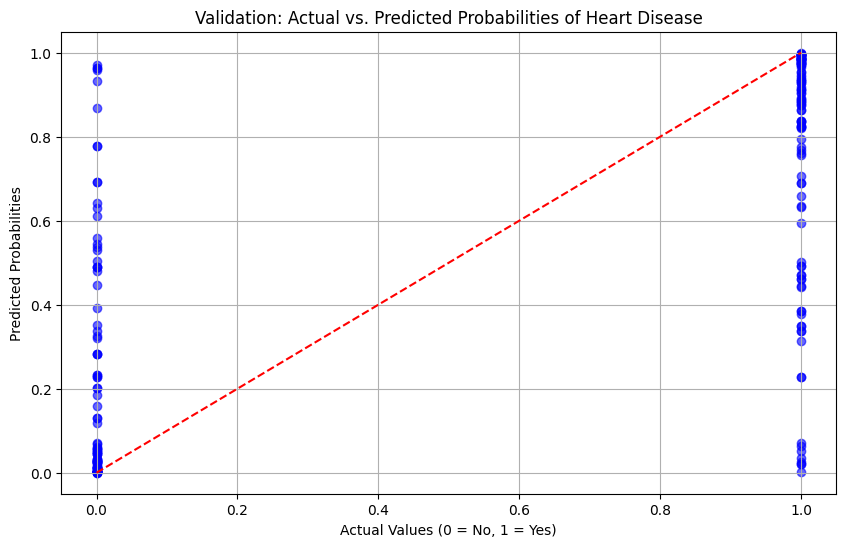

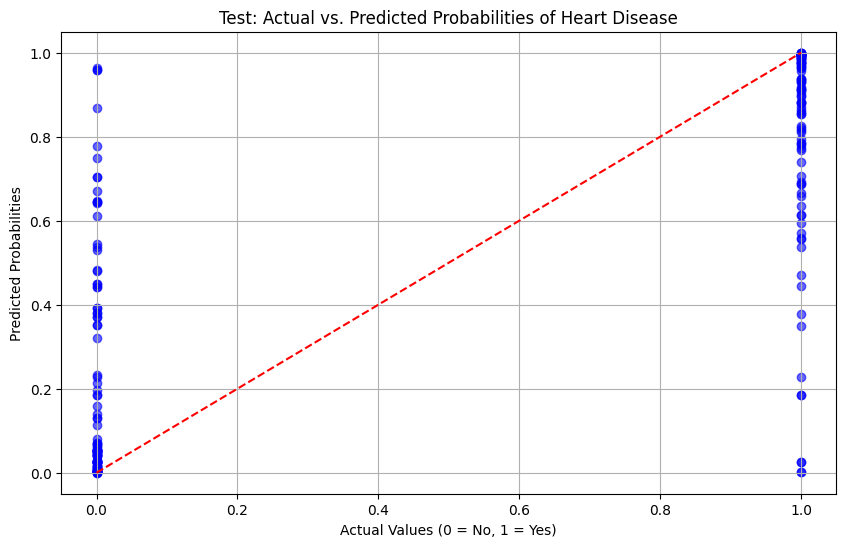

In [ ]:
# compare on chance of heart disease
X_train = train_data.drop(columns=['target'])  # features
y_train = train_data['target'] # chance of heart disease
X_val = val_data.drop(columns=['target'])  # features
y_val = val_data['target'] # chance of heart disease
X_test = test_data.drop(columns=['target'])  # features
y_test = test_data['target'] # chance of heart disease

# create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.fit_transform(X_val)
X_test_poly = poly.fit_transform(X_test)

# create and fit logistic regression model
logm = LogisticRegression()
logm.fit(X_train_poly, y_train)

# make predictions
y_val_pred = logm.predict_proba(X_val_poly)[:, 1]
y_test_pred = logm.predict_proba(X_test_poly)[:, 1]

# visualize
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.6, color='blue')  # Actual vs. Predicted probabilities
plt.title('Validation: Actual vs. Predicted Probabilities of Heart Disease')
plt.xlabel('Actual Values (0 = No, 1 = Yes)')
plt.ylabel('Predicted Probabilities')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Line for perfect prediction
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue')  # Actual vs. Predicted probabilities
plt.title('Test: Actual vs. Predicted Probabilities of Heart Disease')
plt.xlabel('Actual Values (0 = No, 1 = Yes)')
plt.ylabel('Predicted Probabilities')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Line for perfect prediction
plt.grid()
plt.show()

c:\Users\ethan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


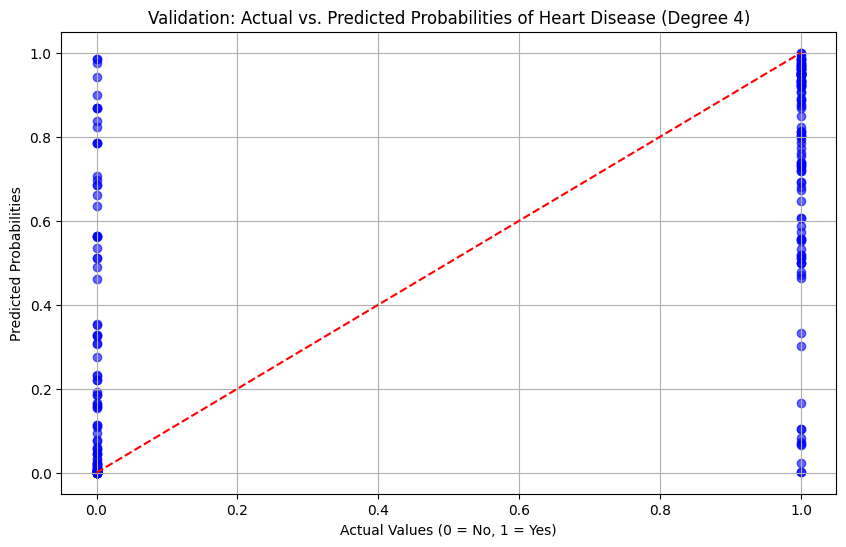

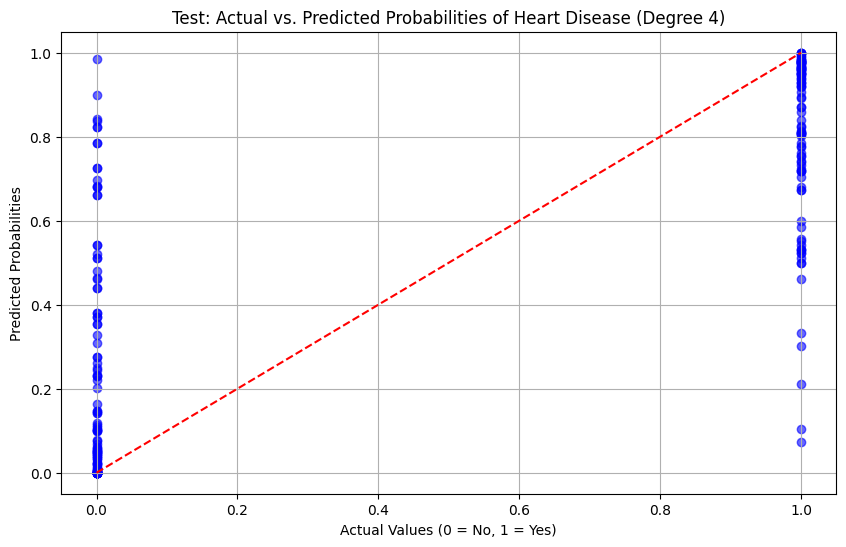

In [14]:
# try higher degree polynomial
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.fit_transform(X_val)
X_test_poly = poly.fit_transform(X_test)

# refit logistic regression model
logm.fit(X_train_poly, y_train)

# make predictions
y_val_pred = logm.predict_proba(X_val_poly)[:, 1]
y_test_pred = logm.predict_proba(X_test_poly)[:, 1]

# visualize
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.6, color='blue')  # Actual vs. Predicted probabilities
plt.title('Validation: Actual vs. Predicted Probabilities of Heart Disease (Degree 4)')
plt.xlabel('Actual Values (0 = No, 1 = Yes)')
plt.ylabel('Predicted Probabilities')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Line for perfect prediction
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue')  # Actual vs. Predicted probabilities
plt.title('Test: Actual vs. Predicted Probabilities of Heart Disease (Degree 4)')
plt.xlabel('Actual Values (0 = No, 1 = Yes)')
plt.ylabel('Predicted Probabilities')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Line for perfect prediction
plt.grid()
plt.show()

c:\Users\ethan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


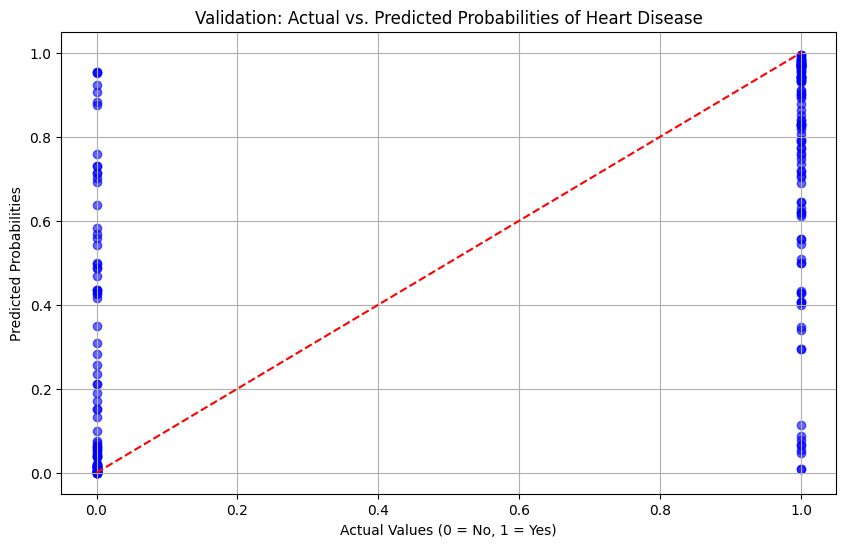

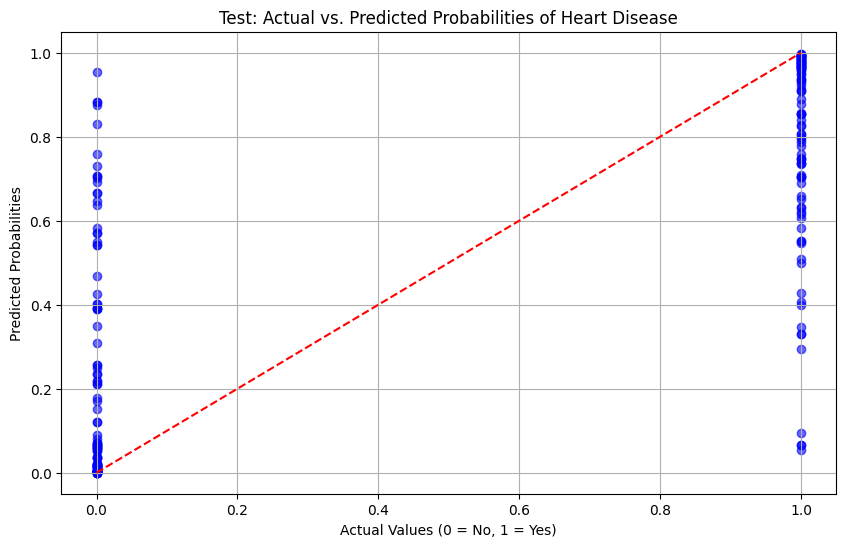

In [15]:
# compare on chance of heart disease
X_train = train_data.drop(columns=['target'])  # features
y_train = train_data['target'] # chance of heart disease
X_val = val_data.drop(columns=['target'])  # features
y_val = val_data['target'] # chance of heart disease
X_test = test_data.drop(columns=['target'])  # features
y_test = test_data['target'] # chance of heart disease

# create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.fit_transform(X_val)
X_test_poly = poly.fit_transform(X_test)

# create and fit polynomial regression model
logm = LogisticRegression(max_iter=200)
logm.fit(X_train_poly, y_train)

# make predictions
y_val_pred = logm.predict_proba(X_val_poly)[:, 1]
y_test_pred = logm.predict_proba(X_test_poly)[:, 1]

# visualize
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.6, color='blue')  # Actual vs. Predicted probabilities
plt.title('Validation: Actual vs. Predicted Probabilities of Heart Disease')
plt.xlabel('Actual Values (0 = No, 1 = Yes)')
plt.ylabel('Predicted Probabilities')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Line for perfect prediction
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue')  # Actual vs. Predicted probabilities
plt.title('Test: Actual vs. Predicted Probabilities of Heart Disease')
plt.xlabel('Actual Values (0 = No, 1 = Yes)')
plt.ylabel('Predicted Probabilities')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Line for perfect prediction
plt.grid()
plt.show()